<a href="https://colab.research.google.com/github/Tucan22/neural-networks/blob/master/cnn_malaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**######################################################################**

**MONTAJE DEL SISTEMA DE FICHEROS**

**######################################################################**

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


**######################################################################**

**PRESENTACIÓN DE LOS DATA SET**

**######################################################################**

Cargamos una imagen de prueba de nuestro data set de entrenamiento, en este caso se corresponde con una célula parasitada con Malaria.

Los data set han sido formulados de la siguiente forma:

**train_set:**

Cuenta con 3.000 imágenes de células, 1.500 de ellas parasitadas y 1.500 de ellas sin parasitar.

**validation_set:**

Cuenta con 1.000 imágenes de células, 500 de ellas parasitadas y 500 de ellas sin parasitar.

Las imágenes contenidas en el validation_set **NO APARECEN EN NINGÚN MOMENTO EN EL TRAIN_SET.**


train_set  validation_set


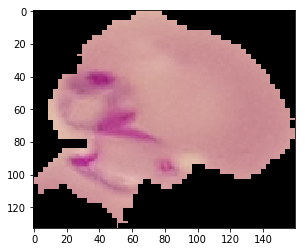

In [4]:
!ls "/content/drive/My Drive/MyDatasets/malaria_cells"

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/content/drive/My Drive/MyDatasets/malaria_cells/train_set/Parasitized/C84P45ThinF_IMG_20150818_104849_cell_4.png', 'r')
imshow(np.asarray(pil_im))


In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

**######################################################################**

**PRIMER MODELO**

**######################################################################**

**ESTADO INICIAL**

- Tras reformular los data set de entrenamiento y validación (inicialmente contaban con pocas muestras y no representativas) se pudo corregir en gran medida el overfitting inicial con el que contaba el modelo.
- Tras reducir dicho overfitting, la precisión del modelo de validación pasó de estar estancada en el 50% a alcanzar un 80%.
- El modelo contaba en este momento con un error de validación muy errático.

**######################################################################**

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
150/150 [==============================] - 31s 209ms/step - loss: 0.6807 - acc: 0.5717 - val_loss: 0.6746 - val_acc: 0.6102
Epoch 2/20
150/150 [==============================] - 31s 206ms/step - loss: 0.6220 - acc: 0.6567 - val_loss: 0.6812 - val_acc: 0.5544
Epoch 3/20
150/150 [==============================] - 29s 196ms/step - loss: 0.5762 - acc: 0.7010 - val_loss: 0.7168 - val_acc: 0.6482
Epoch 4/20
150/150 [==============================] - 29s 197ms/step - loss: 0.5118 - acc: 0.7580 - val_loss: 0.5775 - val_acc: 0.7389
Epoch 5/20
150/150 [==============================] - 32s 214ms/step - loss: 0.3724 - acc: 0.8620 - val_loss: 0.7760 - val_acc: 0.8161
Epoch 6/20
150/150 [==============================] - 30s 201ms/step - loss: 0.2685 - acc: 0.9143 - val_loss: 0.5005 - val_acc: 0.8318
Epoch 7/20
150/150 [==============================] - 30s 198ms/step - loss: 0.2235 - acc: 0.9320 - val_lo

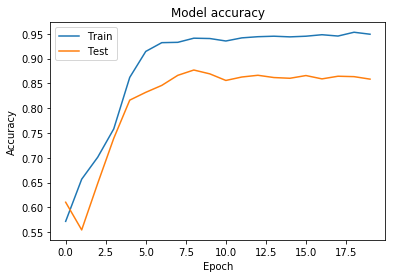

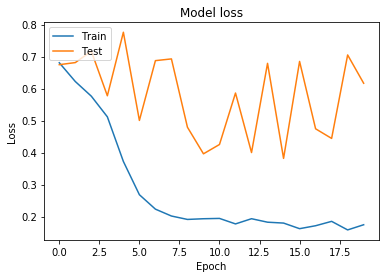

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras
from time import time
import matplotlib.pyplot as plt

# DATA SOURCE --------------------------------------------------

batch_size = 20

train_data_dir = '/content/drive/My Drive/MyDatasets/malaria_cells/train_set'
validation_data_dir = '/content/drive/My Drive/MyDatasets/malaria_cells/validation_set'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        vertical_flip=True,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(140, 140),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(140, 140),
        batch_size=32,
        class_mode='categorical')

# MODEL --------------------------------------------------

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(140, 140, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=1.0),
              metrics=['accuracy'])


# TRAINING --------------------------------------------------

epochs = 20

Stats = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=epochs, 
        validation_data=validation_generator,
        validation_steps=300,
)


# Plot training & validation accuracy values
plt.plot(Stats.history['acc'])
plt.plot(Stats.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(Stats.history['loss'])
plt.plot(Stats.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
model.save("/content/drive/My Drive/Models/malaria_cells/model91.h5")

**######################################################################**


**SEGUNDO MODELO (capa extra + learning rate de 0.95)**

**######################################################################**

**CAMBIOS**


- Añadida una capa densa adicional con 128 neuronas.
- Modificación del learning rate al 0.95.
- Modificación de los steps per epoch de training y validación a 100 y 300 respectivamente.

**RESULTADOS**

- Disminución del comportamiento errático del error de validación.
- Aumento de la precisión en la validación, estabilizándose ahora en el 88.7% frente al 86% del modelo anterior

**######################################################################**

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 [==============================] - 26s 263ms/step - loss: 0.6814 - acc: 0.5975 - val_loss: 0.7273 - val_acc: 0.4919
Epoch 2/20
100/100 [==============================] - 24s 240ms/step - loss: 0.6470 - acc: 0.6285 - val_loss: 0.6826 - val_acc: 0.5906
Epoch 3/20
100/100 [==============================] - 24s 237ms/step - loss: 0.5838 - acc: 0.6930 - val_loss: 0.7702 - val_acc: 0.5810
Epoch 4/20
100/100 [==============================] - 26s 262ms/step - loss: 0.4599 - acc: 0.8015 - val_loss: 0.5340 - val_acc: 0.7889
Epoch 5/20
100/100 [==============================] - 24s 238ms/step - loss: 0.3388 - acc: 0.8630 - val_loss: 0.4193 - val_acc: 0.8526
Epoch 6/20
100/100 [==============================] - 24s 237ms/step - loss: 0.2305 - acc: 0.9175 - val_loss: 0.4838 - val_acc: 0.8548
Epoch 7/20
100/100 [==============================] - 25s 249ms/step - loss: 0.2079 - acc: 0.9310 - val_lo

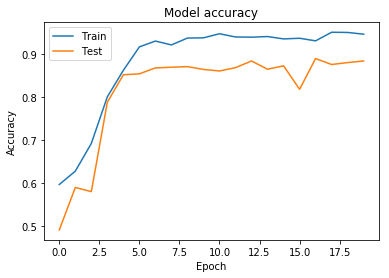

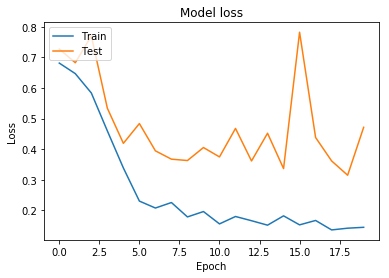

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras
from time import time
import matplotlib.pyplot as plt

# DATA SOURCE --------------------------------------------------

batch_size = 20

train_data_dir = '/content/drive/My Drive/MyDatasets/malaria_cells/train_set'
validation_data_dir = '/content/drive/My Drive/MyDatasets/malaria_cells/validation_set'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        vertical_flip=True,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(140, 140),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(140, 140),
        batch_size=32,
        class_mode='categorical')

# MODEL --------------------------------------------------

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(140, 140, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=0.95),
              metrics=['accuracy'])


# TRAINING --------------------------------------------------

epochs = 20

Stats = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=epochs, 
        validation_data=validation_generator,
        validation_steps=300,
)


# Plot training & validation accuracy values
plt.plot(Stats.history['acc'])
plt.plot(Stats.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(Stats.history['loss'])
plt.plot(Stats.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**######################################################################**

**MODELO DEFINITIVO (capa extra + correciones)**

**######################################################################**

**CAMBIOS**


- Corregida la capa de salida, ahora cuenta con una única neurona y la función sigmoide para clasificar las 2 categorías.
- Cambiada la función de error a binary_crossentropy al estar trabajando con 2 categorías.
- Cambiado el modo de clasificación a binario.
- Aumentado el número de epocas de 20 a 25 al ver que el modelo parecía acercarse al 90% conforme entrenaba.
- Modificación de los steps per epoch de training y validación a 300 y 400 respectivamente.

**RESULTADOS**

- Disminución del comportamiento errático del error de validación.
- Aumento de la precisión en la validación, estabilizándose ahora en el 91.5% frente al 88.7% del modelo anterior

**######################################################################**

Using TensorFlow backend.


Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/25
300/300 [==============================] - 1340s 4s/step - loss: 0.6570 - acc: 0.6183 - val_loss: 0.7322 - val_acc: 0.5279
Epoch 2/25
300/300 [==============================] - 44s 145ms/step - loss: 0.4994 - acc: 0.7623 - val_loss: 0.5196 - val_acc: 0.7586
Epoch 3/25
300/300 [==============================] - 42s 141ms/step - loss: 0.2577 - acc: 0.9098 - val_loss: 0.5046 - val_acc: 0.8696
Epoch 4/25
300/300 [==============================] - 44s 145ms/step - loss: 0.2027 - acc: 0.9382 - val_loss: 0.3710 - val_acc: 0.8643
Epoch 5/25
300/300 [==============================] - 43s 144ms/step - loss: 0.1933 - acc: 0.9402 - val_loss: 0.4583 - val_acc: 0.8824
Epoch 6

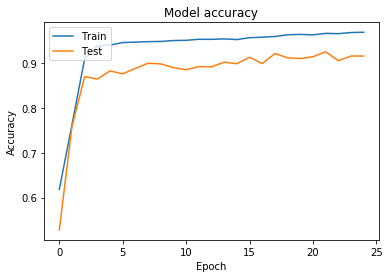

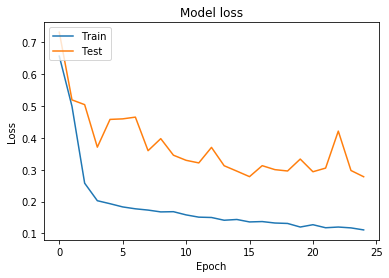

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras
from time import time
import matplotlib.pyplot as plt

# DATA SOURCE --------------------------------------------------

batch_size = 20

train_data_dir = '/content/drive/My Drive/MyDatasets/malaria_cells/train_set'
validation_data_dir = '/content/drive/My Drive/MyDatasets/malaria_cells/validation_set'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        vertical_flip=True,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(140, 140),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(140, 140),
        batch_size=32,
        class_mode='binary')

# MODEL --------------------------------------------------

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(140, 140, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
#model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=1.0),
              metrics=['accuracy'])


# TRAINING --------------------------------------------------

epochs = 25

Stats = model.fit_generator(
        train_generator,
        steps_per_epoch=300,
        epochs=epochs, 
        validation_data=validation_generator,
        validation_steps=400,
)


# Plot training & validation accuracy values
plt.plot(Stats.history['acc'])
plt.plot(Stats.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(Stats.history['loss'])
plt.plot(Stats.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()